<a href="https://colab.research.google.com/github/Gabs-Dimitri/ANN-MNIST/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

## Importação das bibliotecas

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Carregando dados do tensorflow

Os dados do mnist no tensorflow estão disponibilizados da seguinte maneira: 60000 instâncias para treino e 10000 para teste. Logo, fazemos a concatenação dos dados para armazenar tudo em uma variável x (imagens) e uma variável y (rótulos).

In [2]:
(x_tr, y_tr), (x_t, y_t) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x = np.concatenate((x_tr, x_t), axis=0)
y = np.concatenate((y_tr, y_t), axis=0)

## Padronização dos dados

Valores dos pixels nas imagens estão na faixa de 0 a 255.

In [4]:
x = x / 255.0

## Split

In [5]:
x_ann_train, x_ann_test, y_ann_train, y_ann_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Modelo

* Camada de entrada $Flatten$ para transformar uma matriz bidimensional em um vetor unidimensional. A camada $Flatten$ é usada para preparar os dados de entrada de uma rede neural convolucional para serem usados por uma árvore de decisão ou outro modelo de aprendizado de máquina que espera uma entrada unidimensional;

* Camadas ocultas com ativação $ReLU$, comumente usada em camadas ocultas de redes neurais para introduzir não linearidade e capturar padrões complexos nos dados;

* Camada de saída com ativação $Softmax$, comumente usada para problemas de classificação multiclasse, onde estamos tentando prever a probabilidade de cada classe.  

In [6]:
model = Sequential([
  Flatten(input_shape=(28, 28)),  # Camada de entrada (transforma a matriz 28x28 em vetor de 784 elementos)
  Dense(128, activation='relu'),  # Primeira camada oculta com 128 neurônios e ativação ReLU
  Dense(64, activation='relu'),   # Segunda camada oculta com 64 neurônios e ativação ReLU
  Dense(10, activation='softmax') # Camada de saída com 10 neurônios (um para cada classe) e ativação softmax
])

## Compilando modelo

Perda usando uma função para problemas de classificação multiclasse.

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Função de perda para problemas de classificação multiclasse
              metrics=['accuracy'])

## Treino do modelo

In [8]:
model.fit(x_ann_train, y_ann_train, epochs=5, validation_data=(x_ann_test, y_ann_test))

Epoch 1/5
1641/1641 [==============================] - 8s 4ms/step - loss: 0.2496 - accuracy: 0.9281 - val_loss: 0.1634 - val_accuracy: 0.9498
Epoch 2/5
1641/1641 [==============================] - 7s 5ms/step - loss: 0.1056 - accuracy: 0.9673 - val_loss: 0.1085 - val_accuracy: 0.9654
Epoch 3/5
1641/1641 [==============================] - 9s 5ms/step - loss: 0.0728 - accuracy: 0.9767 - val_loss: 0.0976 - val_accuracy: 0.9698
Epoch 4/5
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0568 - accuracy: 0.9815 - val_loss: 0.0912 - val_accuracy: 0.9718
Epoch 5/5
1641/1641 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0863 - val_accuracy: 0.9755


## Prevendo resultados

Como as previsões do modelo são probabilidades para cada classe, usamos o **argmax** do numpy para converter as previsões de probabilidades para rótulos de classe.

In [9]:
y_ann_pred = model.predict(x)

y_ann_pred_labels = np.argmax(y_ann_pred, axis=1)

2188/2188 [==============================] - 3s 2ms/step


## Matriz de confusão e acurácia

In [10]:
cm_ann = confusion_matrix(y, y_ann_pred_labels)

print(cm_ann)
acc_ann = accuracy_score(y, y_ann_pred_labels)
print(round(acc_ann, 6))

[[6844    0    3    3    2    9   16    1   20    5]
 [   0 7814    7    7    8    3    3    8   10   17]
 [   6   13 6880   23   12    2    5   14   27    8]
 [   1    2   12 7045    1   48    0    6   20    6]
 [   0    1    3    0 6755    1    7    2    2   53]
 [   1    0    1   28    3 6253    6    0    9   12]
 [  11    5    2    0    5   31 6814    0    8    0]
 [   0   19   21   11   15    8    1 7146    5   67]
 [   3   13    4   22   10   19    9    3 6720   22]
 [   3    2    0   35   19    9    1   11   10 6868]]
0.9877


## Criando visualização

4/4 [==============================] - 0s 3ms/step


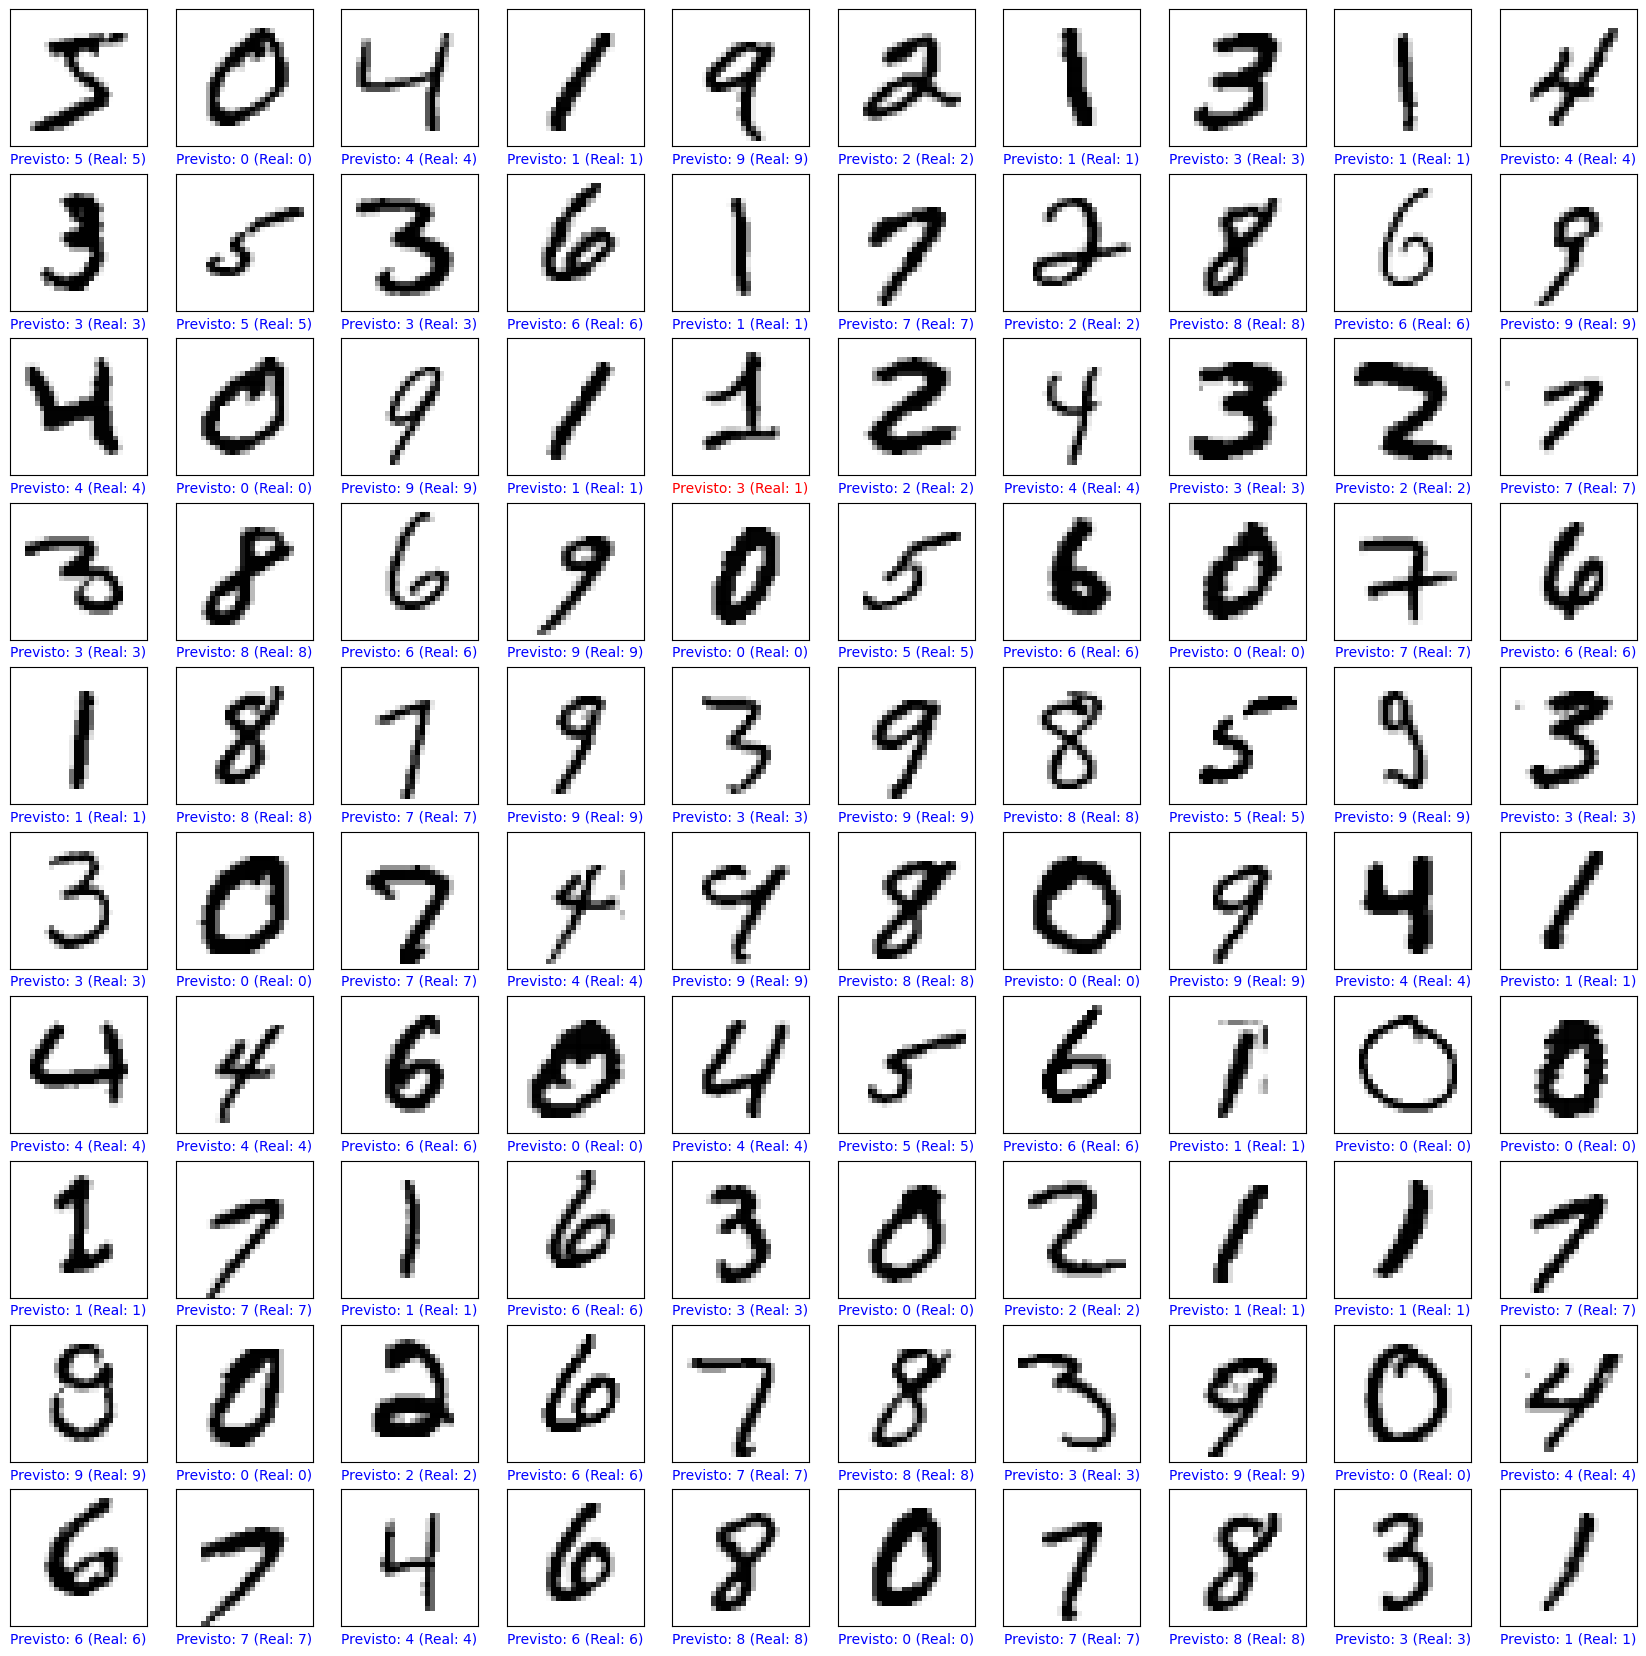

In [11]:
# Previsões para as primeiras n imagens do conjunto
predictions = model.predict(x[:100])

# Visualização das previsões e dos rótulos reais
plt.figure(figsize=(21, 21))
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = y[i]
  color = 'blue' if predicted_label == true_label else 'red'
  plt.xlabel(f'Previsto: {predicted_label} (Real: {true_label})', color=color)
plt.show()

# Árvore

## Redimensionamento

Como x é uma matriz tridimensional e o classificador da árvore aceita dados bidimensionais ou menores, precisamos fazer o reshape dos dados.

In [12]:
n_samples = x.shape[0]                                    # Número de imagens
width = x.shape[1]                                        # Largura das imagens
height = x.shape[2]                                       # Altura das imagens
x_tree = np.reshape(x, (n_samples, width * height))       # Número de imagens, quantidade de pixels

## Split

In [13]:
x_tree_train, x_tree_test, y_tree_train, y_tree_test = train_test_split(x_tree, y_ann_pred_labels, test_size=0.25, random_state=0)

## Treinamento da árvore

In [14]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_tree_train, y_tree_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prevendo resultados

In [15]:
y_tree_pred = classifier.predict(x_tree)

## Matriz de confusão e acurácia

In [16]:
cm_tree = confusion_matrix(y_ann_pred_labels, y_tree_pred)
print(cm_tree)
acc_tree = accuracy_score(y_ann_pred_labels, y_tree_pred)
print(round(acc_tree, 6))

[[6758    1   20    6    6   16   22    7   18   15]
 [   3 7772   12   13    8   10    4   17   21    9]
 [  18   13 6671   55   19   17   37   42   37   24]
 [  12   12   54 6894    9   74    8   21   54   36]
 [   5    7   22    6 6618   11   24   19   34   84]
 [  21   17   16   85   18 6100   34   14   54   24]
 [  14   15   23    6   25   29 6708    3   24   15]
 [   5   19   37   30   16    9    3 7023    7   42]
 [  15   20   46   48   31   46   25   16 6532   52]
 [   9    6   12   27   85   33   10   60   53 6763]]
0.969129


## Visualização

**Dúvida**: o real é pra ser do ann ou da árvore?

In [17]:
x_tree_test_reshaped = x_tree_test.reshape(-1, 28, 28)

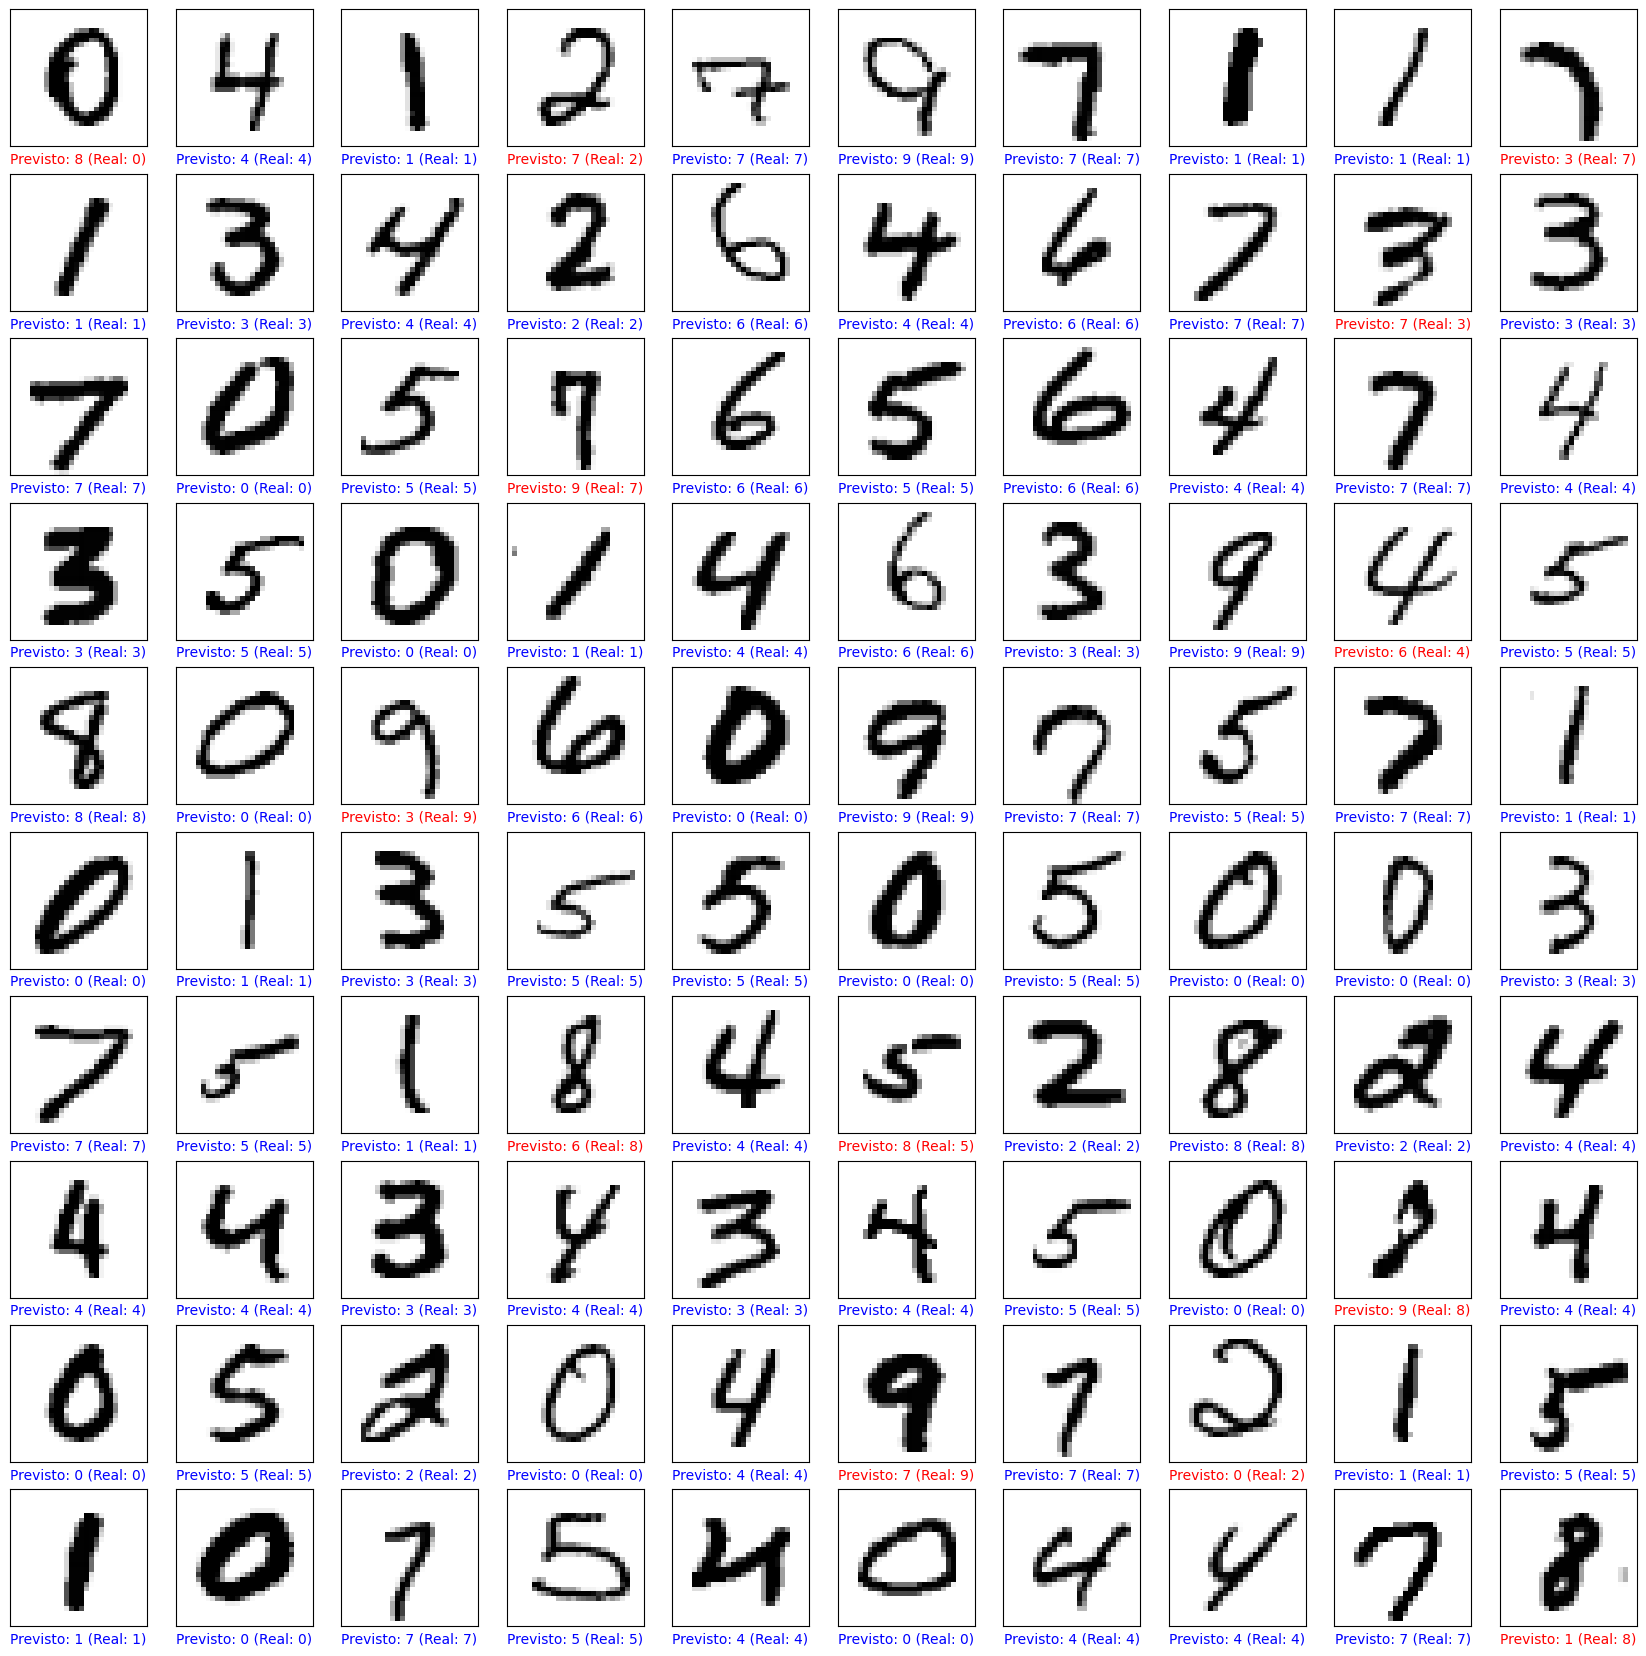

In [18]:
predictions = classifier.predict(x_tree_test[:100])

# Visualizar as previsões e os rótulos reais
plt.figure(figsize=(21, 21))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_tree_test_reshaped[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_ann_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'Previsto: {predicted_label} (Real: {true_label})', color=color)
plt.show()

# Comparação ann / árvore

In [19]:
print('Matriz de confusão ann', '\n', cm_ann, '\n', 'Acurácia ann:', round(acc_ann, 6), '\n', '\n', 'Matriz de confusão árvore', '\n', cm_tree, '\n', 'Acurácia árvore:', round(acc_tree, 6))

Matriz de confusão ann 
 [[6844    0    3    3    2    9   16    1   20    5]
 [   0 7814    7    7    8    3    3    8   10   17]
 [   6   13 6880   23   12    2    5   14   27    8]
 [   1    2   12 7045    1   48    0    6   20    6]
 [   0    1    3    0 6755    1    7    2    2   53]
 [   1    0    1   28    3 6253    6    0    9   12]
 [  11    5    2    0    5   31 6814    0    8    0]
 [   0   19   21   11   15    8    1 7146    5   67]
 [   3   13    4   22   10   19    9    3 6720   22]
 [   3    2    0   35   19    9    1   11   10 6868]] 
 Acurácia ann: 0.9877 
 
 Matriz de confusão árvore 
 [[6758    1   20    6    6   16   22    7   18   15]
 [   3 7772   12   13    8   10    4   17   21    9]
 [  18   13 6671   55   19   17   37   42   37   24]
 [  12   12   54 6894    9   74    8   21   54   36]
 [   5    7   22    6 6618   11   24   19   34   84]
 [  21   17   16   85   18 6100   34   14   54   24]
 [  14   15   23    6   25   29 6708    3   24   15]
 [   5   19   37  

# Adicionando dados fictícios

Gerar dados aleatórios de imagens é algo complicado, dado que são pixels. Sendo assim, foram criados imagens totalmente aleatórias, mas com rótulos previstos pelo modelo ANN.  

## Abrindo novamente os dados

In [20]:
(x_tr, y_tr), (x_t, y_t) = mnist.load_data()

In [21]:
x = np.concatenate((x_tr, x_t), axis=0)
y = np.concatenate((y_tr, y_t), axis=0)

## Gerando n dados fictícios

In [22]:
dados_ficticios = 10000     # Número de dados fictícios a serem gerados
tam_imagem = x.shape[1:]    # Tamanho das imagens do mnist para gerar imagens com o mesmo tamanho

In [23]:
x_ficticio = np.random.randint(0, 256, size=(dados_ficticios, *tam_imagem))    # Gerando imagens fictícias aleatórias

## Prevendo y

In [24]:
y_ficticio_pred = model.predict(x_ficticio)
y_ficticio_pred_labels = np.argmax(y_ficticio_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


## Concatenando com os dados originais

In [25]:
x_total = np.concatenate((x, x_ficticio), axis=0)
y_total = np.concatenate((y, y_ficticio_pred_labels), axis=0)

In [39]:
print("Dados de imagens:", x_total.shape)
print("Dados dos rótulos:", y_total.shape)

Dados de imagens: (80000, 28, 28)
Dados dos rótulos: (80000,)


## Normalizando

In [28]:
x_total = x_total / 255

## Reshape de x

In [29]:
n_samples = x_total.shape[0]
width = x_total.shape[1]
height = x_total.shape[2]
x_total_reshaped = np.reshape(x_total, (n_samples, width * height))

## Split

In [30]:
x_treef_train, x_treef_test, y_treef_train, y_treef_test = train_test_split(x_total_reshaped, y_total, test_size=0.25, random_state=0)

## Treinamento

In [31]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_treef_train, y_treef_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prevendo resultados

In [32]:
y_treef_pred = classifier.predict(x_total_reshaped)

## Matriz de confusão e acurácia

In [37]:
cm_tree_f = confusion_matrix(y_total, y_treef_pred)
print(cm_tree_f)
acc_tree_f = accuracy_score(y_total, y_treef_pred)
print(round(acc_tree_f, 6))

[[ 6761     1    24    11    14    29    36     4    12    11]
 [    0  8027    16    12     5    77     5     9    20     4]
 [   13    11  6790    32    19    13    31    32    52    15]
 [   11    10    36  6865    13    88     9    21    59    39]
 [    7     8    20    15  6595    14    21    27    23    94]
 [   28    92    18    71    20 15516    27    39    49    31]
 [   21    11    19     8    28    24  6736     1    27    11]
 [    2    20    29    17    21    29     0  7211    11    39]
 [   24    27    64    45    21    41    30    13  6525    35]
 [    5     7    30    31    95    36     7    46    30  6671]]
0.971212


## Visualização

In [34]:
x_treef_test_reshaped = x_treef_test.reshape(-1, 28, 28)

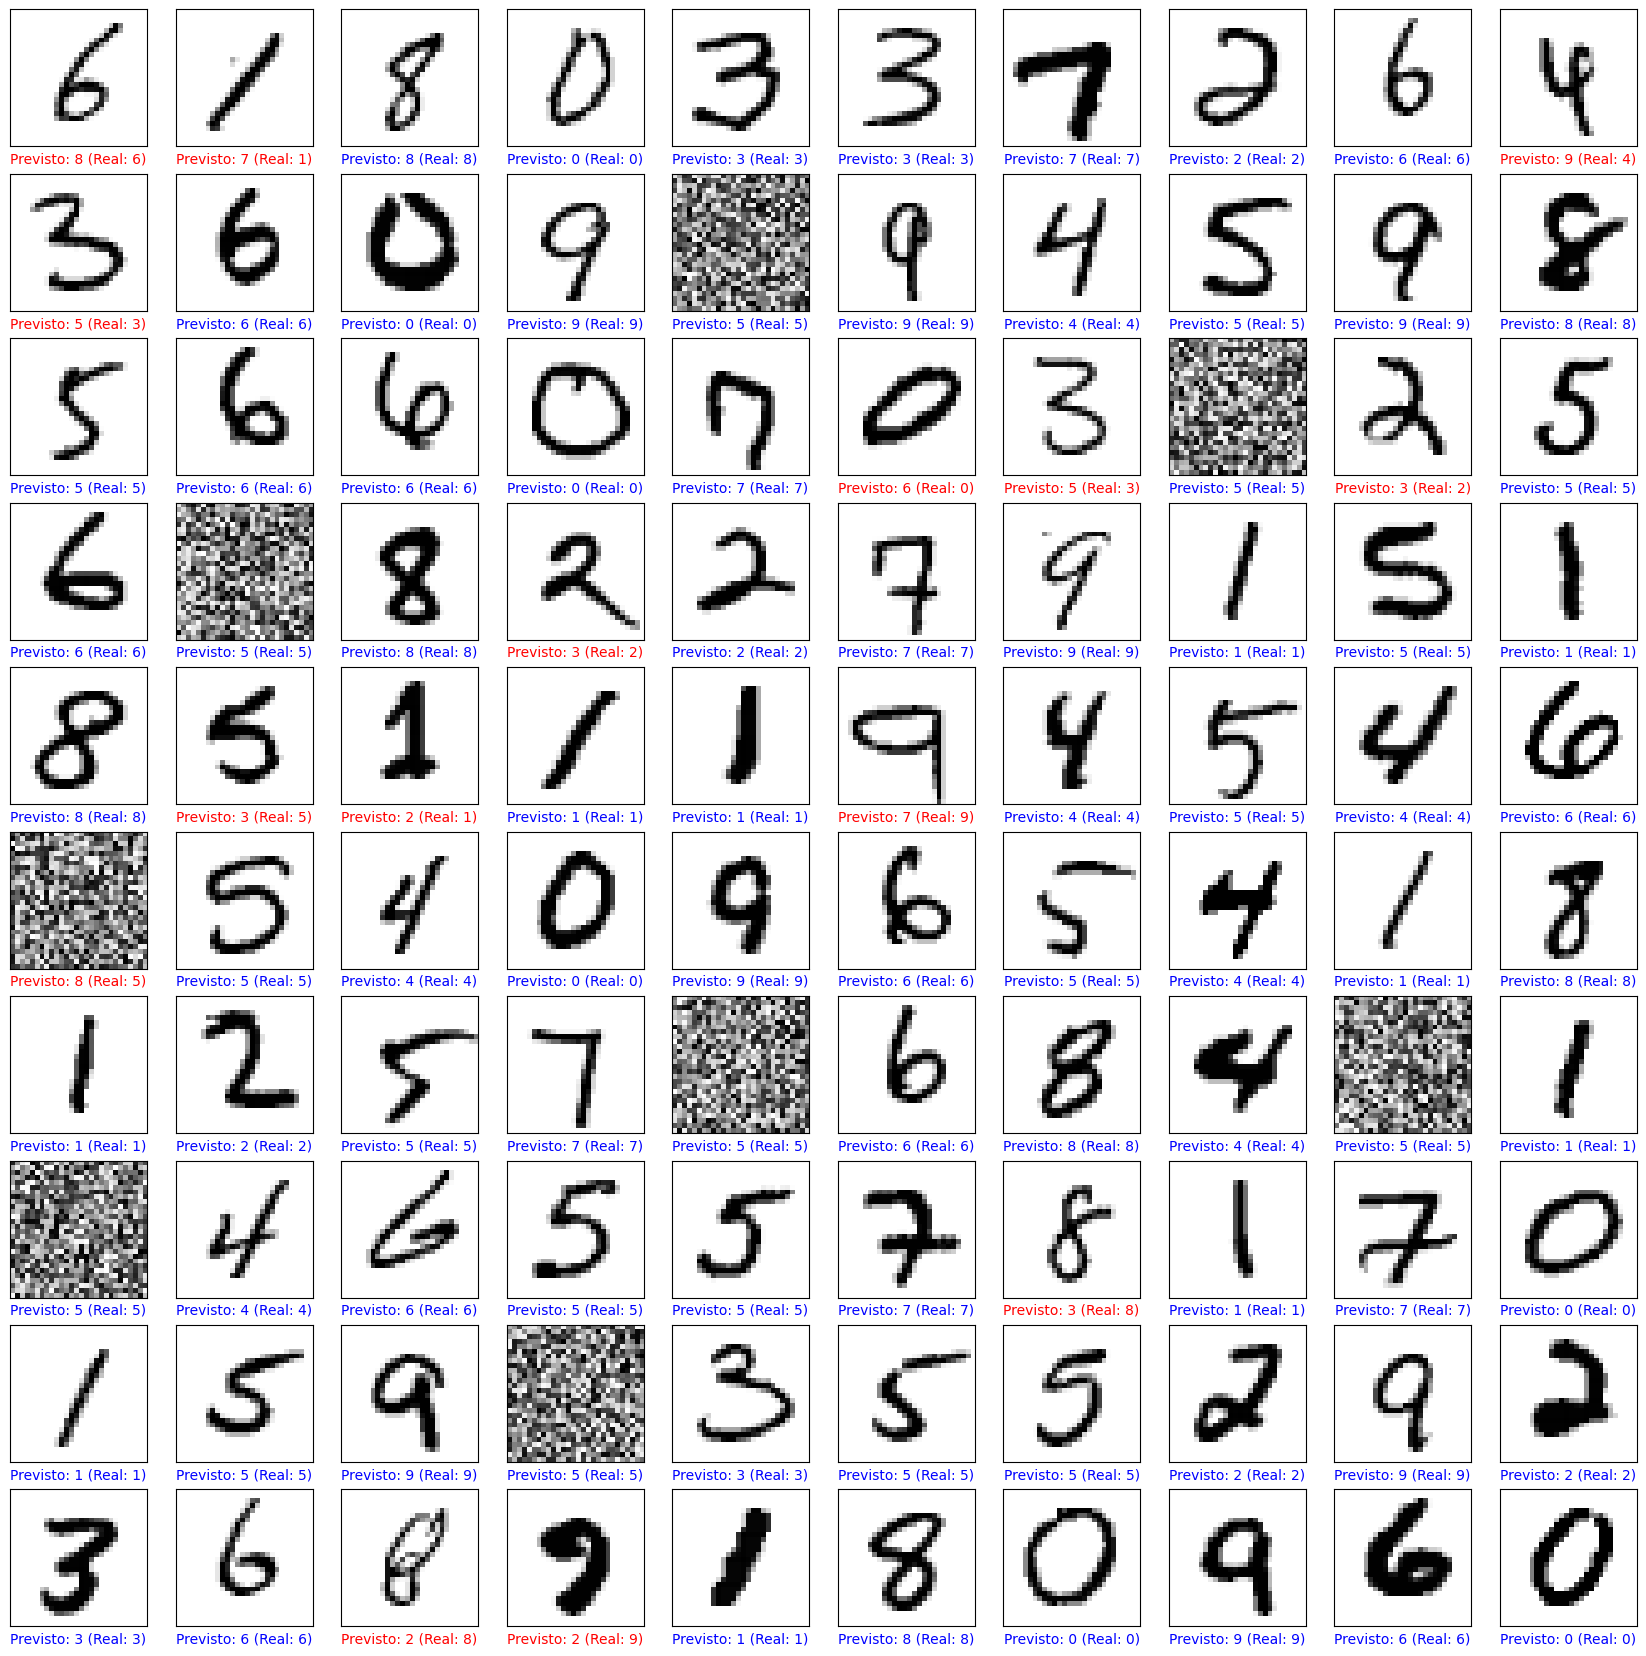

In [38]:
predictions_f = classifier.predict(x_treef_test[:100])

# Visualizar as previsões e os rótulos reais
plt.figure(figsize=(21, 21))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_treef_test_reshaped[i], cmap=plt.cm.binary)
    predicted_label = predictions_f[i]
    true_label = y_treef_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'Previsto: {predicted_label} (Real: {true_label})', color=color)
plt.show()